In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Analysis Chico

## Import the data

In [61]:
from pathlib import Path
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from pathlib import Path
from utils.analysis import *
from utils.chico_analysis import *


subs_of_interest = ['AmItheAsshole', 'confessions', 'tifu']

def import_subreddit(subreddit):
    location_name = Path().cwd() / 'datasets' / f'{subreddit}.csv'
    return pd.read_csv(location_name)

subreddit_df = pd.concat([import_subreddit(subreddit) for subreddit in subs_of_interest], ignore_index=True)

def open_json_sub(subreddit_name):
    path_to_sub = Path().cwd() / 'data' / f'{subreddit_name}.json'
    with open(path_to_sub, 'r') as f:
        subreddit_dict = json.load(f)
    return subreddit_dict

subreddit_dict = {subreddit: open_json_sub(subreddit) for subreddit in subs_of_interest}


In [62]:
results = {}

for sub in subs_of_interest:    
    # posts = scraper.get_subreddit_posts(sub, limit=100, cache=True)
    # posts_df = create_posts_dataframe(subreddit_dict)
    
    tfidf_results = tfidf_df(subreddit_df[subreddit_df['subreddit'] == sub], include_selftext=True)
    # tfidf_results = tfidf_analyze_subreddit(posts)
    tf_idf_scores = get_mean_tfidf(
        tfidf_matrix=tfidf_results['tfidf_matrix'],
        feature_names=tfidf_results['feature_names'],
        return_df=True
    )
    results[sub] = {"posts_df":subreddit_df[subreddit_df['subreddit'] == sub],
                    "tfidf_results":tfidf_results,
                    "tf_idf_scores":tf_idf_scores}



In [66]:
# Extract the vocabulary for each subreddit
vocabularies = {sub: set(results[sub]['tfidf_results']['feature_names']) for sub in subs_of_interest}

# Get the intersection of the vocabularies
common_vocab = set.intersection(*vocabularies.values())

# Report analytics
print(f"Number of common terms across all subreddits: {len(common_vocab)}")
print(f"Common terms: {', '.join(list(common_vocab)[:10])}...")  # Display first 10 common terms

# Calculate Jaccard similarity for each pair of subreddits
for sub1 in subs_of_interest:
    for sub2 in subs_of_interest:
        if sub1 > sub2:
            intersection = vocabularies[sub1].intersection(vocabularies[sub2])
            union = vocabularies[sub1].union(vocabularies[sub2])
            jaccard_similarity = len(intersection) / len(union)
            print(f"Jaccard similarity between {sub1} and {sub2}: {jaccard_similarity:.3f}")

# Report unique terms for each subreddit
for sub in subs_of_interest:
    unique_terms = vocabularies[sub] - common_vocab
    print(f"Number of unique terms in {sub}: {len(unique_terms)}")
    print(f"Unique terms in {sub}: {', '.join(list(unique_terms)[:10])}...")  # Display first 10 unique terms

Number of common terms across all subreddits: 633
Common terms: anyway, might, shower, experience, pay, possible, different, due, possibly, proceed...
Jaccard similarity between confessions and AmItheAsshole: 0.549
Jaccard similarity between tifu and AmItheAsshole: 0.589
Jaccard similarity between tifu and confessions: 0.570
Number of unique terms in AmItheAsshole: 367
Unique terms in AmItheAsshole: spending, grandparent, household, intention, express, lily, shock, complain, stuck, fiancé...
Number of unique terms in confessions: 367
Unique terms in confessions: protect, express, fear, poor, manipulate, stuck, paint, moan, mentally, ocd...
Number of unique terms in tifu: 367
Unique terms in tifu: assignment, shock, poor, complain, paint, texted, awake, teeth, delete, coworker...


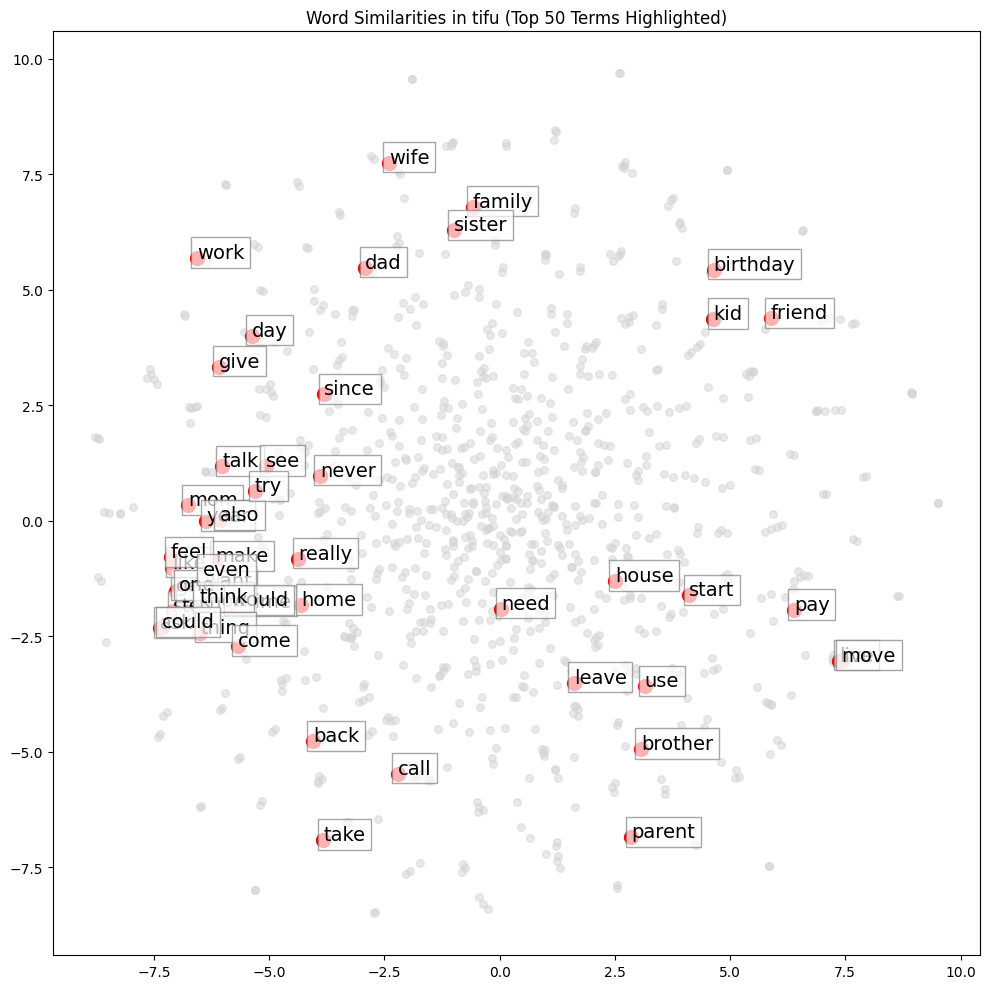

In [67]:
fig, ax = plot_word_similarities_tsne(results['AmItheAsshole']['tfidf_results']['tfidf_matrix'], 
                                results['AmItheAsshole']['tfidf_results']['feature_names'],
                                n_highlight=50, # Try changing this value
                                title=sub)
plt.show()

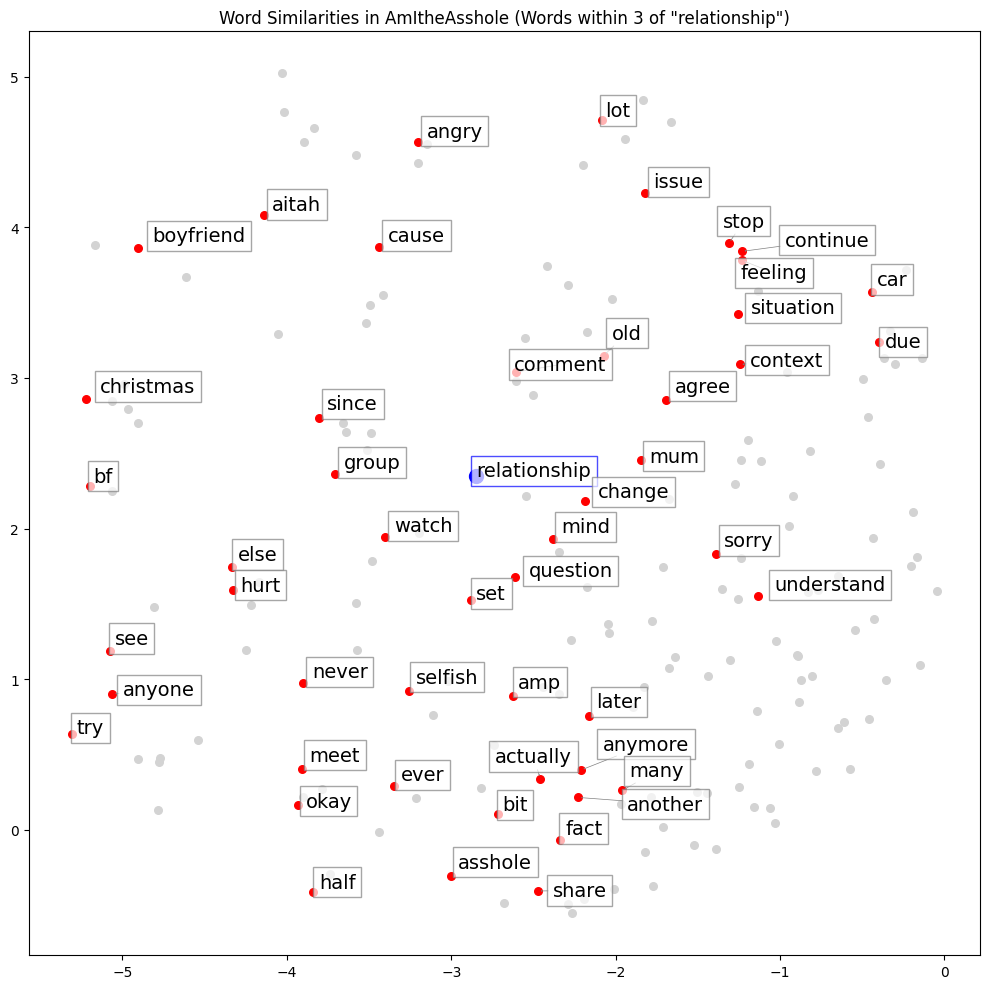

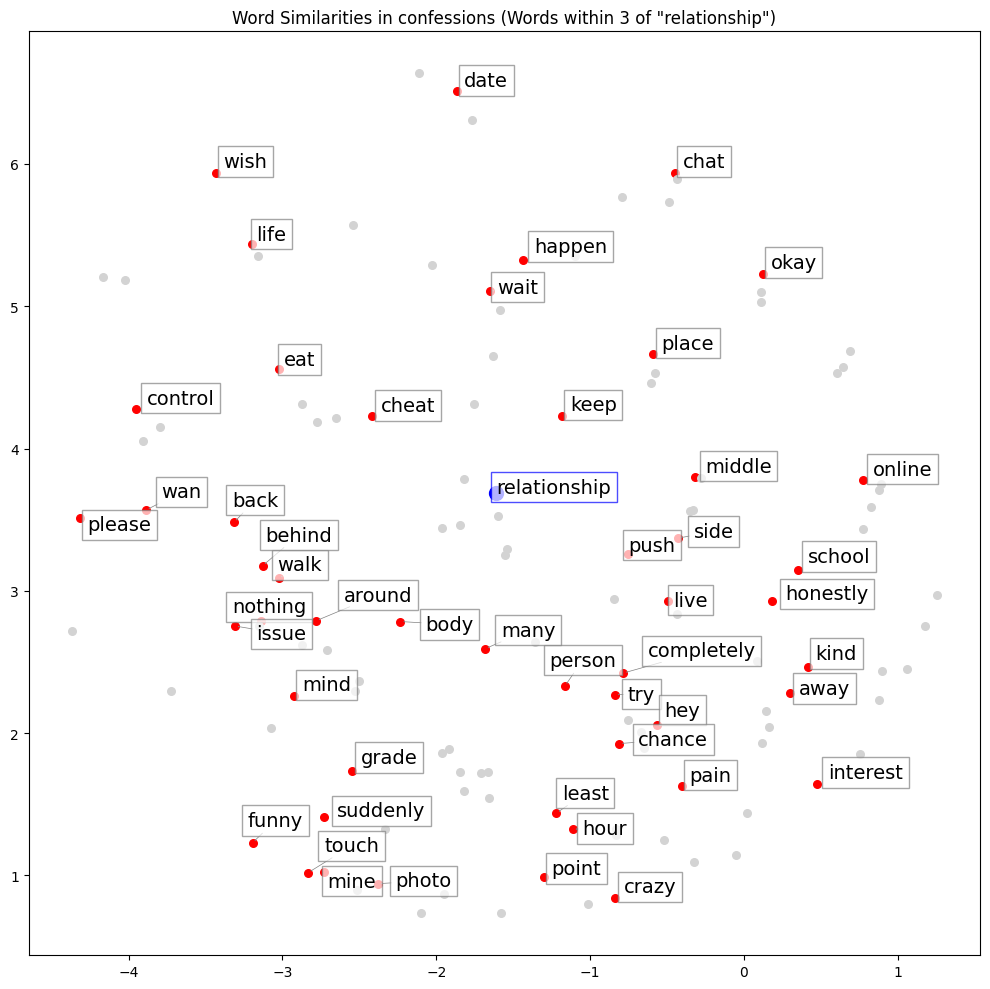

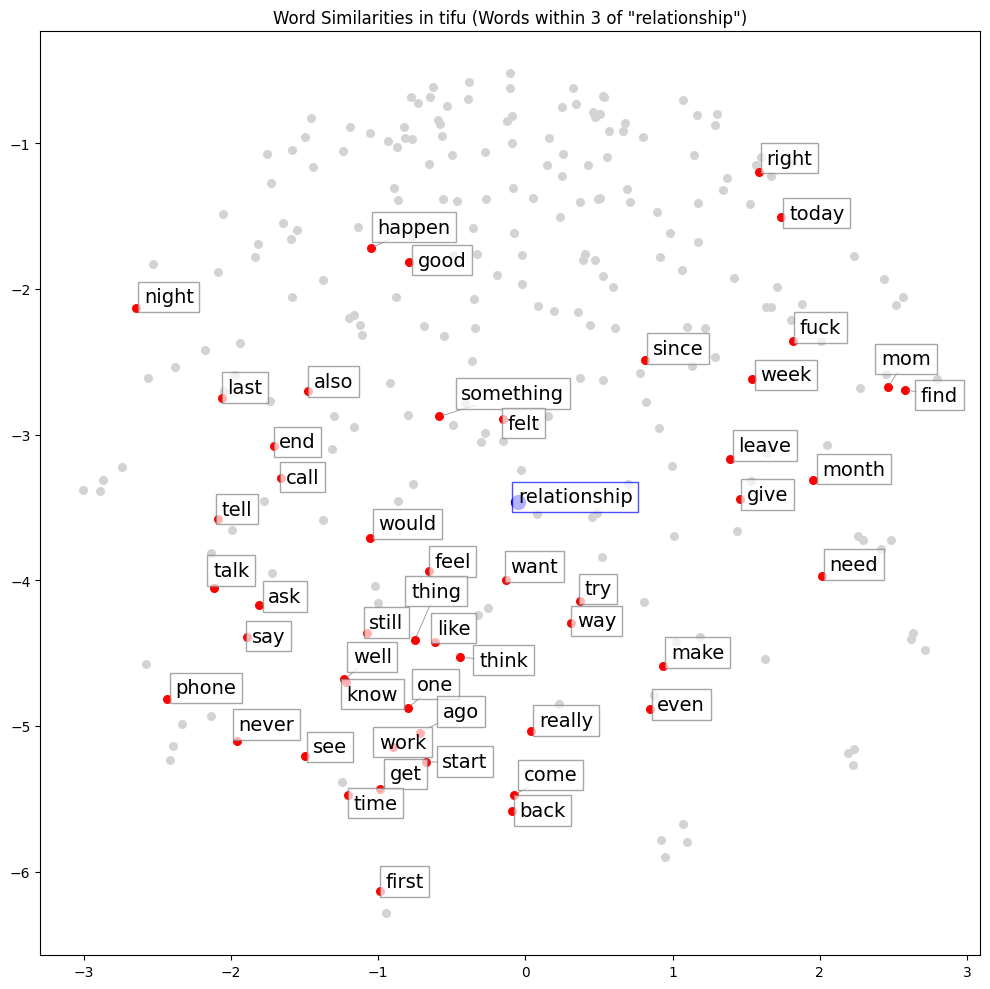

In [68]:
for sub in subs_of_interest:
    fig, ax = plot_word_distance(results[sub]['tfidf_results']['tfidf_matrix'], 
                                    results[sub]['tfidf_results']['feature_names'],
                                    word = "relationship",
                                    distance = 3,
                                    n_highlight=50, # Try changing this value
                                    title=sub)
    plt.show()

In [ ]:
# Reduce the environment to check strong communities
# Check for similar words in the center and see the environment they are present in

Check the difference in age and gender for subreddits

In [71]:
subreddit_df['full_textual'] = subreddit_df['title'] + ' ' + subreddit_df['selftext']

In [75]:
subreddit_df['full_textual'].str.lower().str.extractall(r'\b(\d{1,2}(f|m|nb)|(f|m|nb)\d{1,2})\b')[0]

      match
1     0        25f
      1        34f
      2        34m
      3         6m
5     0        28f
              ... 
1489  0        23f
      1        21m
      2        19m
1490  0        18m
1497  0        18m
Name: 0, Length: 740, dtype: object